# Decision Tree Regressor model on data from Expedia without the addition of new features

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the data
df1 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_05_07.csv")
df2 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_20_06.csv")
df3 = pd.read_csv(r"C:\Users\User\Desktop\expedia_clean_dfs\expedia_clean_df_25_06.csv")

# Merge the dataframes
df = pd.concat([df1, df2, df3], ignore_index=True)

In [60]:
# Remove outliers in 'price_per_night' using the IQR method
Q1 = df['price_per_night'].quantile(0.25)
Q3 = df['price_per_night'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows where 'price_per_night' is an outlier
df = df[(df['price_per_night'] >= lower_bound) & (df['price_per_night'] <= upper_bound)]

In [61]:
df["full_price"] = df["price_per_night"] * df["LOS"]

# Run desicion tree model to predict price per night

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE    Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.278690   42.679700  1821.556751  32.913005  0.268062  43.437119   
1      8  0.385843   39.382185  1550.956499  30.053486  0.367255  40.386709   
2     10  0.497814   35.611694  1268.192762  26.629103  0.439249  38.019723   
3     12  0.610318   31.370066   984.081061  22.430543  0.489832  36.264406   

      Test MSE   Test MAE  
0  1886.783287  33.409878  
1  1631.086226  30.783981  
2  1445.499313  28.621211  
3  1315.107128  26.708955  


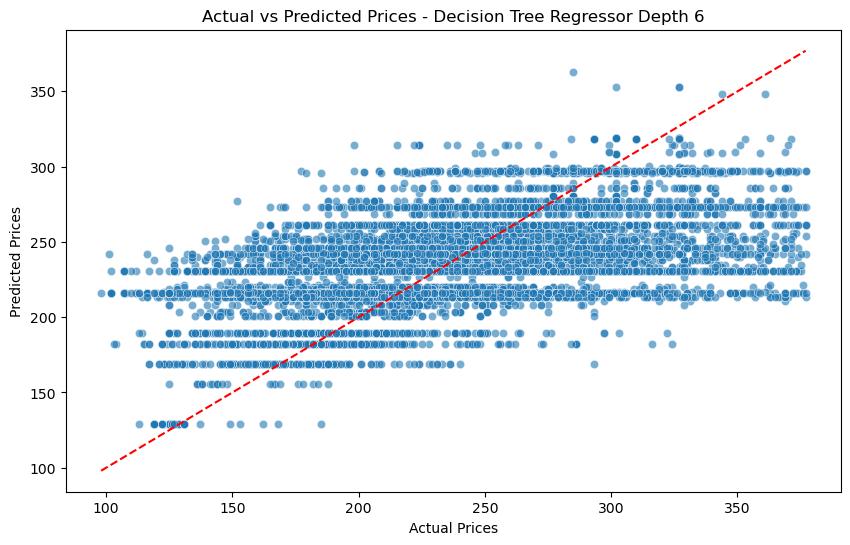

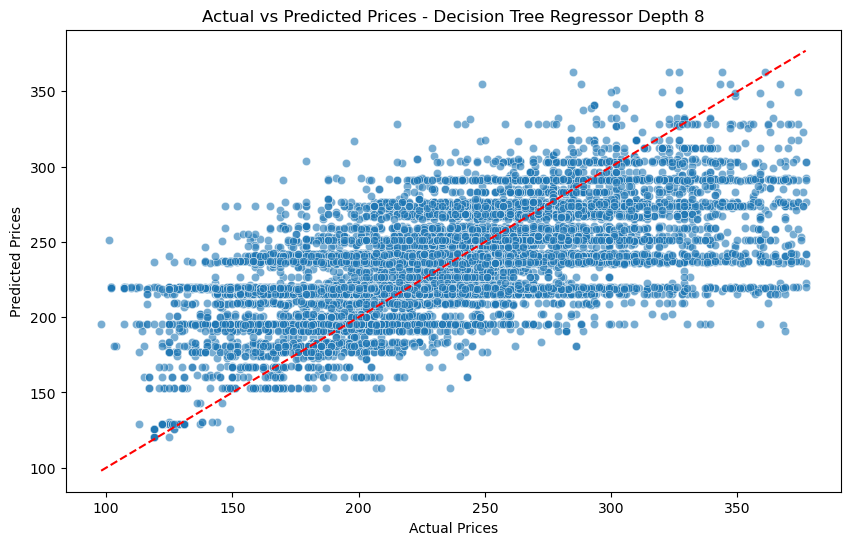

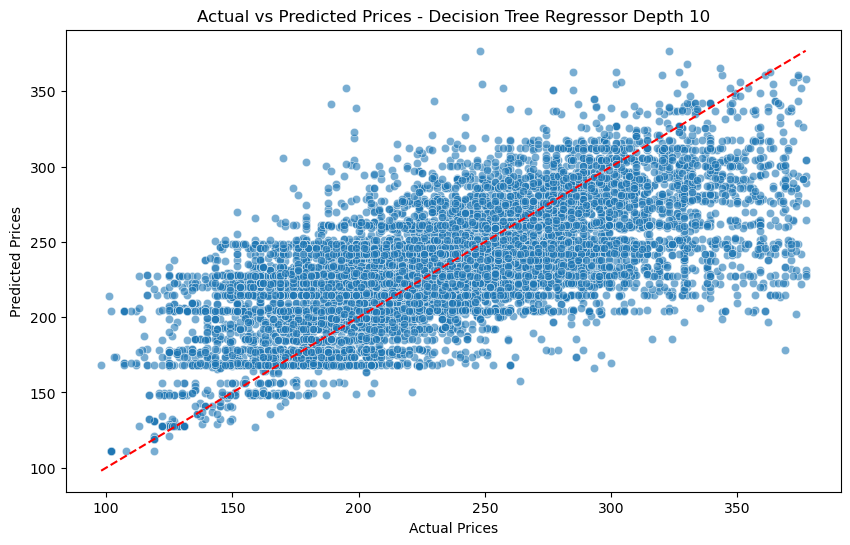

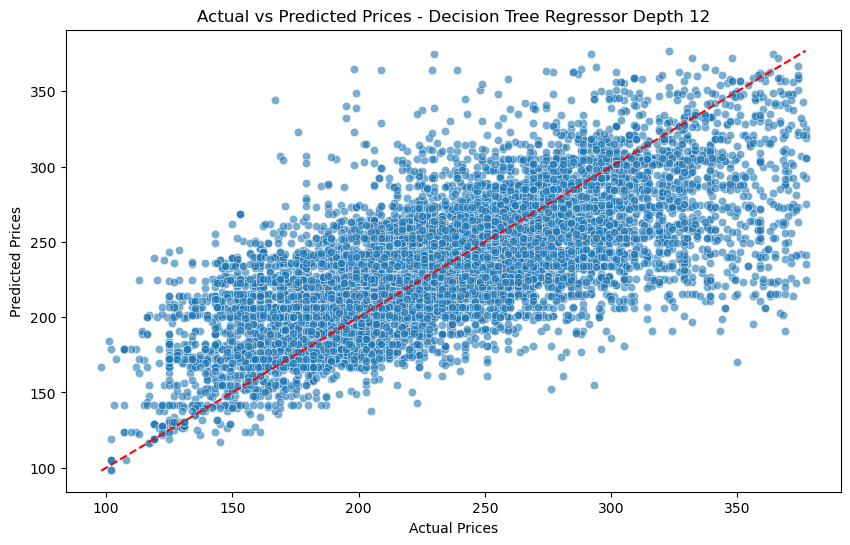

In [57]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'price_per_night',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
df = df[columns_to_use]

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

# Feature engineering process on the data

In [62]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# df = pd.concat([df1, df2, df3], ignore_index=True)

# Ensure 'Snapshot' is in datetime format
df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')

# Ensure 'TTT' and 'LOS' are numeric
df['TTT'] = pd.to_numeric(df['TTT'], errors='coerce')
df['LOS'] = pd.to_numeric(df['LOS'], errors='coerce')

# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day name of check-in and check-out
df['checkin_day_name'] = df['checkin'].dt.day_name()
df['checkout_day_name'] = df['checkout'].dt.day_name()

# Convert day names to categorical variables
df['checkin_day_name'] = df['checkin_day_name'].astype('category')
df['checkout_day_name'] = df['checkout_day_name'].astype('category')


# Calculate check-in date by adding 'TTT' to 'Snapshot'
df['checkin'] = df['Snapshot'] + pd.to_timedelta(df['TTT'], unit='d')

# Calculate check-out date by adding 'LOS' to 'checkin'
df['checkout'] = df['checkin'] + pd.to_timedelta(df['LOS'], unit='d')

# Add columns for the day of the month for check-in and check-out
df['checkin_day'] = df['checkin'].dt.day
df['checkout_day'] = df['checkout'].dt.day

# Function to determine the period of the month
def determine_period(start_day, end_day):
    avg_day = (start_day + end_day) / 2
    if avg_day < 10:
        return 'beginning of the month'
    elif 10 <= avg_day < 22:
        return 'middle of the month'
    else:
        return 'end of the month'

# Apply the function to create the 'period_of_the_month' column
df['period_of_the_month'] = df.apply(lambda row: determine_period(row['checkin_day'], row['checkout_day']), axis=1)

# Perform one-hot encoding for 'checkin_day_name', 'checkout_day_name', and 'period_of_the_month'
checkin_encoder = OneHotEncoder(sparse=False)
encoded_checkin = checkin_encoder.fit_transform(df[['checkin_day_name']])

checkout_encoder = OneHotEncoder(sparse=False)
encoded_checkout = checkout_encoder.fit_transform(df[['checkout_day_name']])

period_encoder = OneHotEncoder(sparse=False)
encoded_period = period_encoder.fit_transform(df[['period_of_the_month']])

# Create DataFrames for the encoded columns
encoded_checkin_df = pd.DataFrame(encoded_checkin, columns=checkin_encoder.get_feature_names_out(['checkin_day_name']))
encoded_checkout_df = pd.DataFrame(encoded_checkout, columns=checkout_encoder.get_feature_names_out(['checkout_day_name']))
encoded_period_df = pd.DataFrame(encoded_period, columns=period_encoder.get_feature_names_out(['period_of_the_month']))

# Drop the original columns and concatenate the new one-hot encoded columns
df = df.drop(columns=['checkin_day_name', 'checkout_day_name', 'period_of_the_month'])
df = df.join(encoded_checkin_df).join(encoded_checkout_df).join(encoded_period_df)

# Save the updated DataFrame to a new CSV file
# output_file = './05_07_hotels_data_cleaned_with_days_name_parameters_period_encoded.csv'
# df.to_csv(output_file, index=False)

# Display the first few rows of the updated DataFrame
print(df.head())

C:\Users\User\AppData\Local\Temp\ipykernel_17608\1617303282.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Snapshot'] = pd.to_datetime(df['Snapshot'], errors='coerce')


             Snapshot  start_date    end_date  \
0 2024-07-12 14:43:06  06/07/2024  07/07/2024   
1 2024-07-12 14:43:06  06/07/2024  07/07/2024   
2 2024-07-12 14:43:12  06/07/2024  07/07/2024   
3 2024-07-12 14:43:12  06/07/2024  07/07/2024   
4 2024-07-12 14:43:12  06/07/2024  07/07/2024   

                                                name  TTT  LOS  score  \
0                               Omni Berkshire Place    1    1   9.29   
1                         The Washington by LuxUrban    1    1   8.28   
2                       Hyatt Grand Central New York    1    1   8.08   
3  The Cloud One New York-Downtown, by the Motel ...    1    1   8.88   
4                              45 Times Square Hotel    1    1   8.68   

   reviews  price_per_night  original_price  ...  checkout_day_name_Monday  \
0     1223              269             299  ...                       0.0   
1     1006              188             209  ...                       0.0   
2     3726              246     

C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Decision Tree Regressor model - on Expedia data with additions of new features and after we have done one hot encoding for them (a period of the month - beginning, middle and end, day of the week of check in, day of the week of check out)

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE    Train MSE  Train MAE   Test R2  Test RMSE  \
0      6  0.356337   40.317126  1625.470613  31.300800  0.349605  40.946113   
1      8  0.471747   36.524227  1334.019131  28.197985  0.444753  37.832691   
2     10  0.583577   32.428552  1051.610998  24.568280  0.531352  34.757416   
3     12  0.687878   28.075187   788.216132  20.407352  0.577830  32.988878   
4     13  0.735767   25.831761   667.279880  18.251528  0.587591  32.605300   
5     14  0.778710   23.639670   558.833976  16.146545  0.598369  32.176406   

      Test MSE   Test MAE  
0  1676.584158  31.823194  
1  1431.312531  29.176863  
2  1208.077978  26.467226  
3  1088.266071  24.518505  
4  1063.105605  23.974230  
5  1035.321104  23.418812  


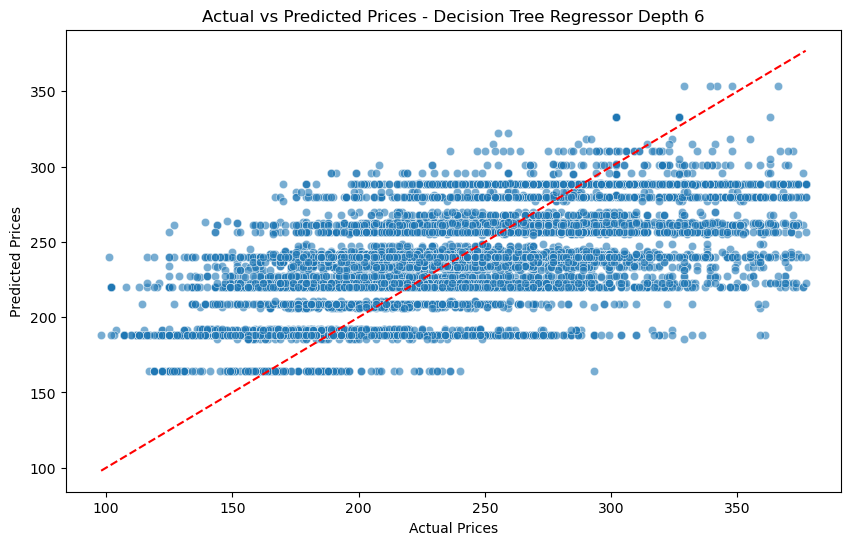

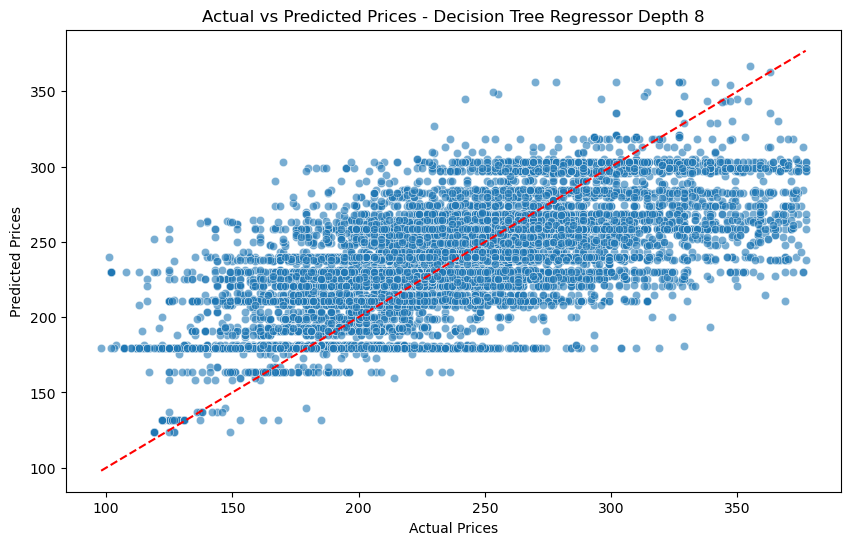

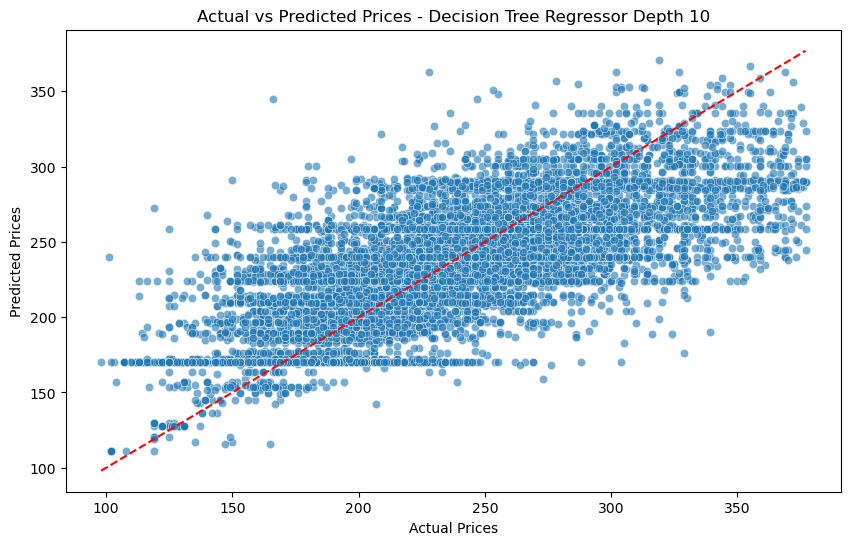

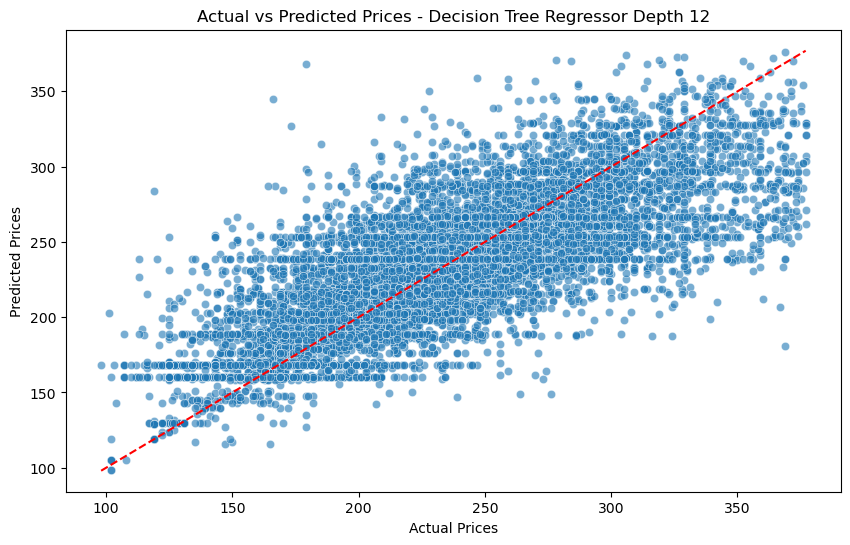

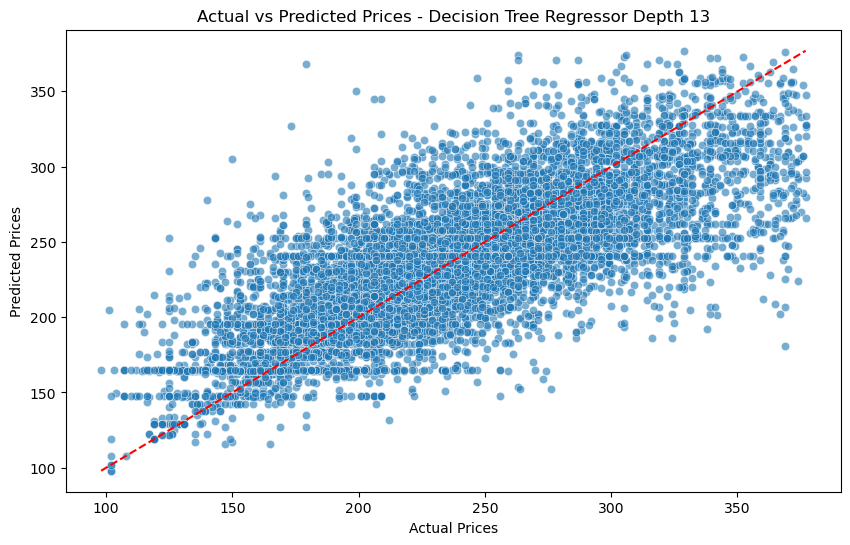

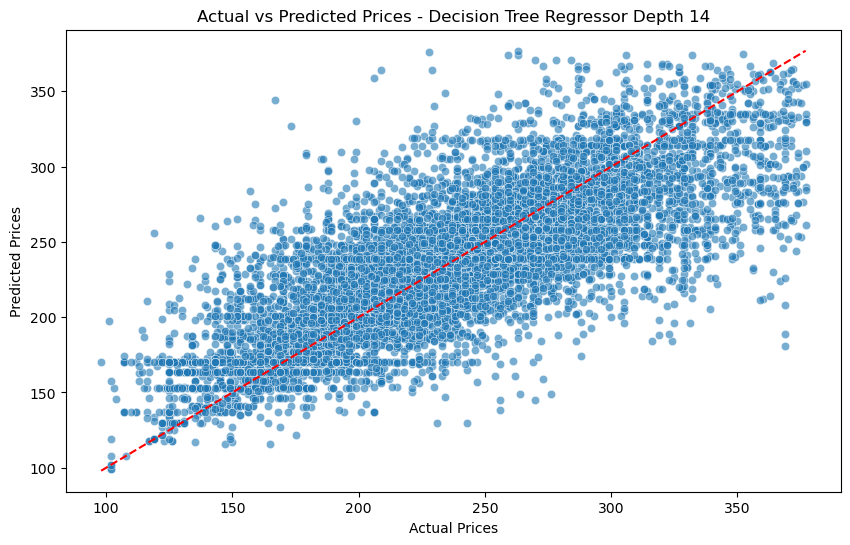

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'price_per_night',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center',
       'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['price_per_night'])
y = df['price_per_night']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

# Run the Model to predict the full price

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE     Train MSE   Train MAE   Test R2  \
0      6  0.851170  141.547861  20035.796997  101.809393  0.851891   
1      8  0.874892  129.777896  16842.302165   92.565697  0.871210   
2     10  0.897816  117.286743  13756.179977   82.384725  0.885810   
3     12  0.923766  101.305218  10262.747150   68.787692  0.896734   

    Test RMSE      Test MSE    Test MAE  
0  142.381586  20272.516035  101.936328  
1  132.771203  17628.192229   94.439680  
2  125.019269  15629.817627   87.903858  
3  118.888868  14134.563053   83.108827  


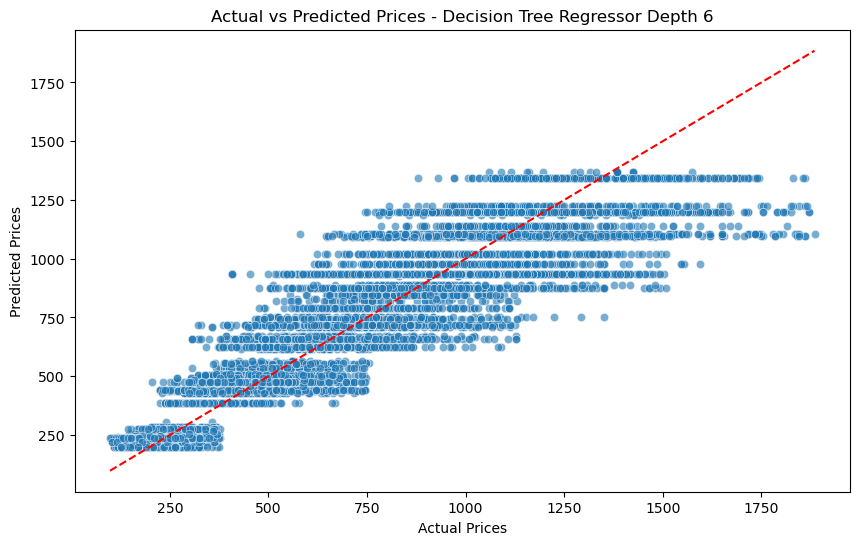

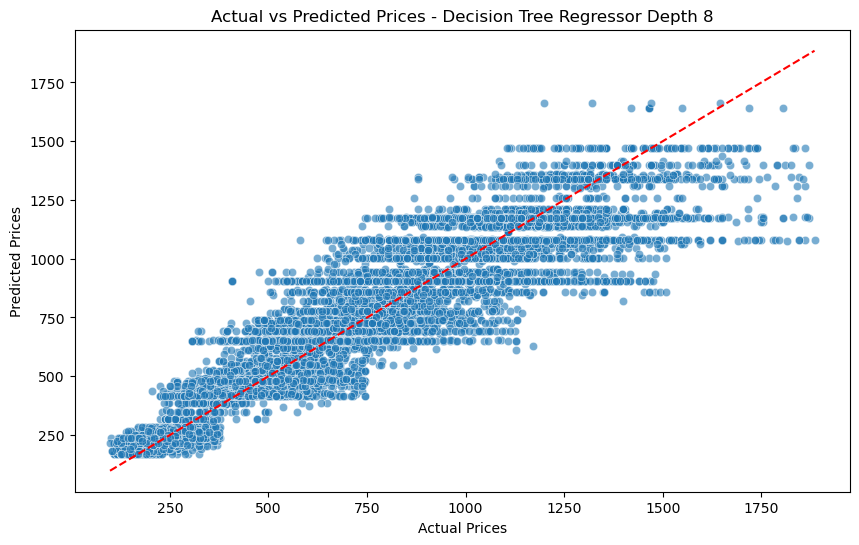

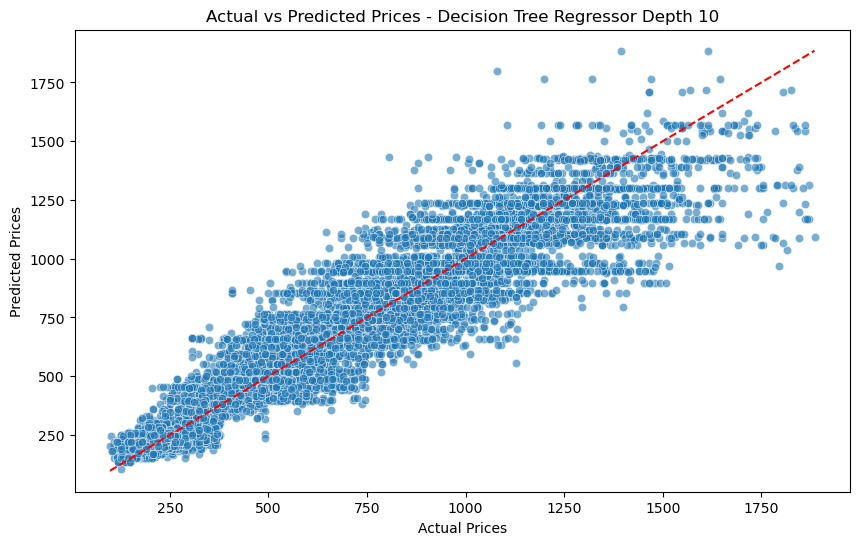

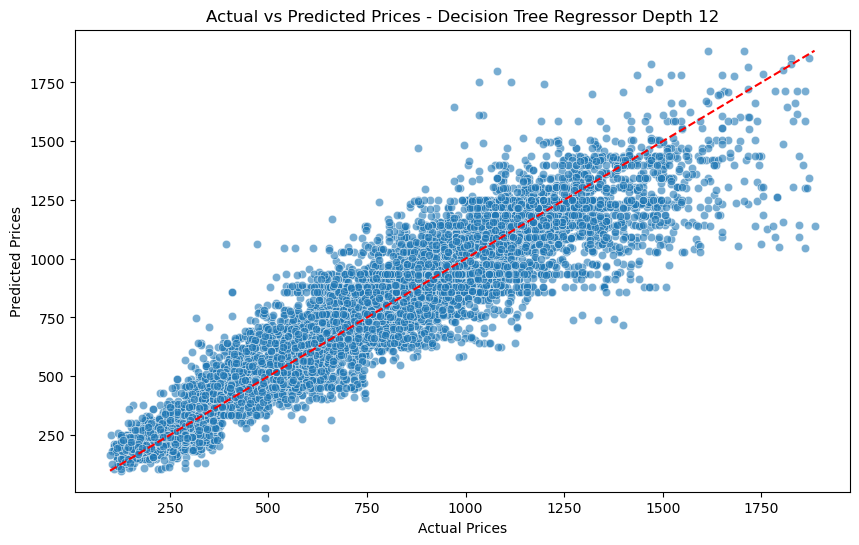

In [43]:
# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center']
df = df[columns_to_use]

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()

# Run the model to predict full price with new features (after feature engineering):

In [50]:
df.columns

Index(['Snapshot', 'start_date', 'end_date', 'name', 'TTT', 'LOS', 'score',
       'reviews', 'price_per_night', 'original_price', 'discount_perc',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'Index', 'star_rating', 'location_rating', 'neighborhood',
       'km_from_center', 'neighborhood_category', 'full_price', 'checkin',
       'checkout', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of th

Decision Tree Regressor Results:
   Depth  Train R2  Train RMSE     Train MSE  Train MAE   Test R2   Test RMSE  \
0      6  0.864125  135.247223  18291.811274  98.107466  0.864860  136.005102   
1      8  0.886192  123.778234  15321.051305  89.052984  0.881088  127.578061   
2     10  0.913681  107.797935  11620.394867  76.613100  0.901983  115.827862   
3     12  0.937231   91.924364   8450.088744  63.394349  0.914137  108.409098   
4     13  0.948354   83.382918   6952.711007  55.939712  0.916528  106.888966   
5     14  0.958145   75.063970   5634.599553  48.827682  0.918427  105.665851   

       Test MSE   Test MAE  
0  18497.387756  98.663579  
1  16276.161592  91.631445  
2  13416.093584  82.904564  
3  11752.532551  77.091520  
4  11425.250962  75.630076  
5  11165.272018  74.307702  


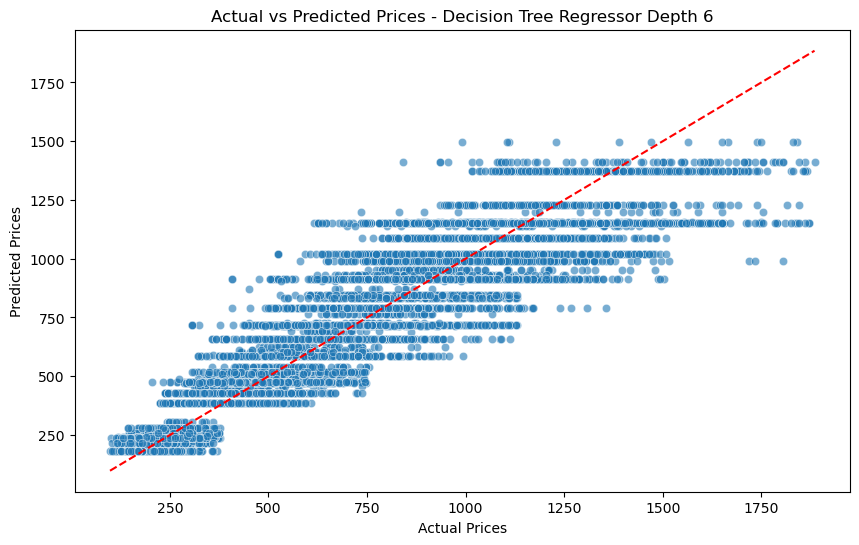

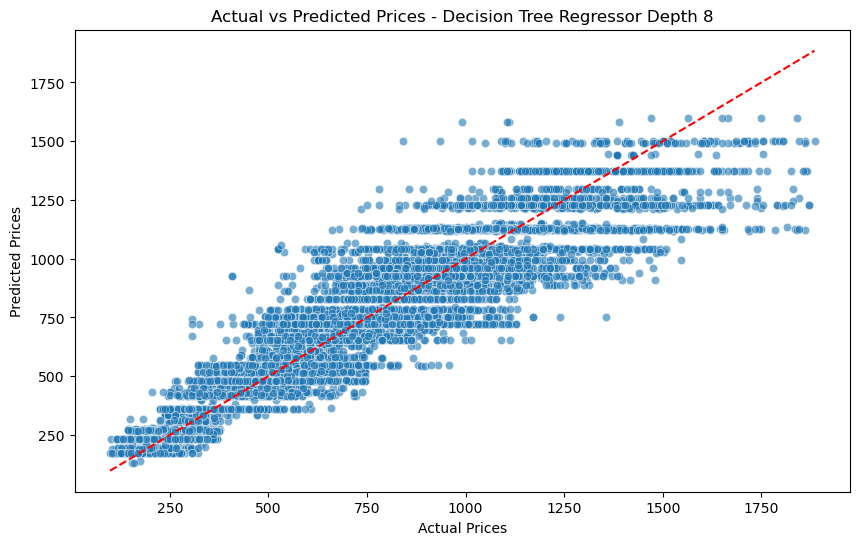

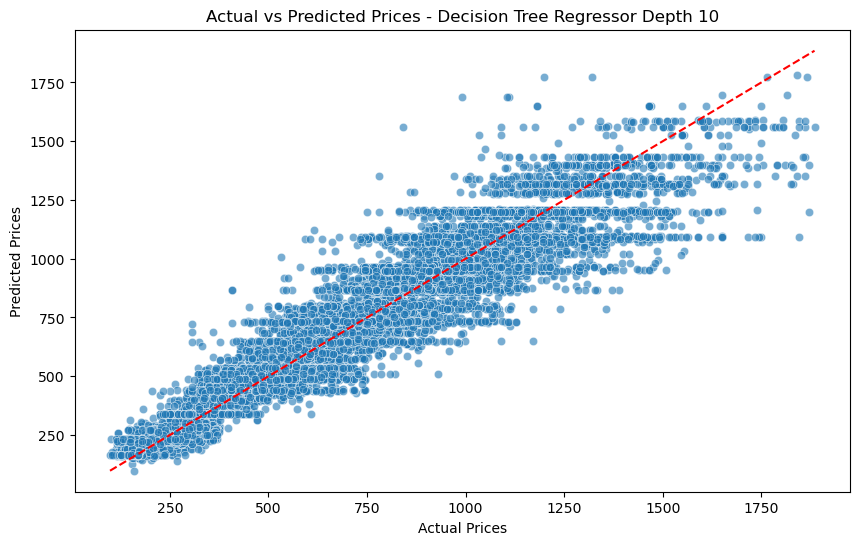

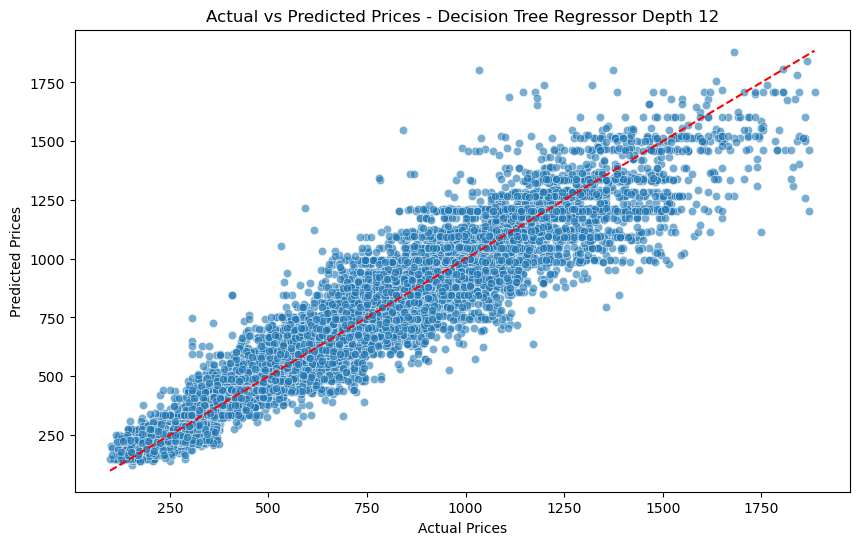

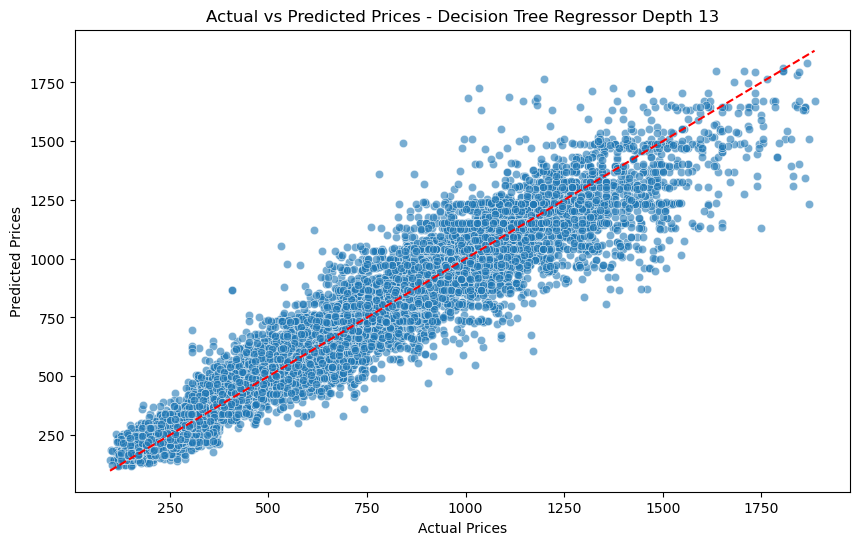

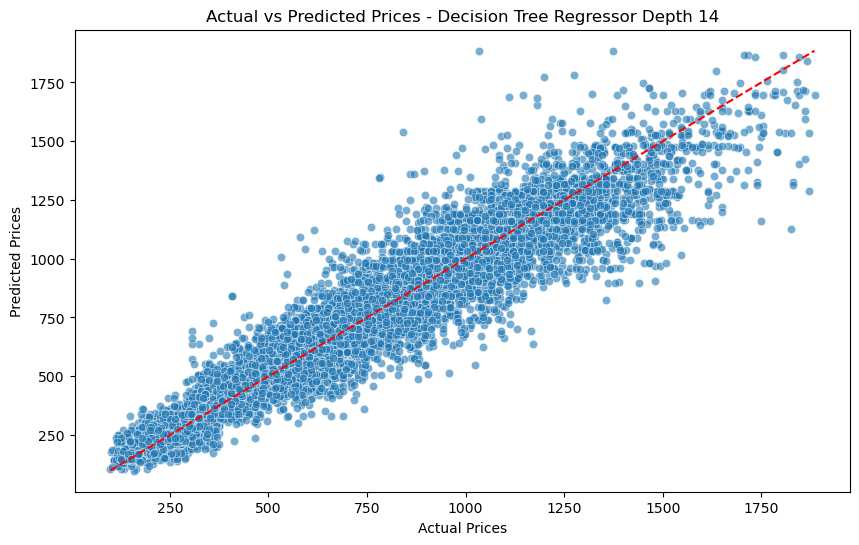

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Merge the dataframes
# df = pd.concat([df1, df2, df3], ignore_index=True)

# Remove columns that are not needed for regression
columns_to_use = ['TTT', 'LOS', 'score',
       'reviews', 'full_price',
       'Free_cancellation', 'No_payment', 'Breakfast', 'Option Member',
       'star_rating', 'location_rating',
       'km_from_center', 'checkin_day', 'checkout_day', 'checkin_day_name_Friday',
       'checkin_day_name_Monday', 'checkin_day_name_Saturday',
       'checkin_day_name_Sunday', 'checkin_day_name_Thursday',
       'checkin_day_name_Tuesday', 'checkin_day_name_Wednesday',
       'checkin_day_name_nan', 'checkout_day_name_Friday',
       'checkout_day_name_Monday', 'checkout_day_name_Saturday',
       'checkout_day_name_Sunday', 'checkout_day_name_Thursday',
       'checkout_day_name_Tuesday', 'checkout_day_name_Wednesday',
       'checkout_day_name_nan', 'period_of_the_month_beginning of the month',
       'period_of_the_month_end of the month',
       'period_of_the_month_middle of the month']
df = df[columns_to_use]

# Fill NaN values for the entire dataset
df = fill_na_with_group_mean(df)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

# Remove columns with all NaN values
df = df.dropna(axis=1, how='all')

# Ensure there are no remaining NaN values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the data into train and test sets
X = df.drop(columns=['full_price'])
y = df['full_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models with different depths
depths = [6, 8, 10, 12,13,14]
results = []
predictions = {}

for depth in depths:
    model = DecisionTreeRegressor(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Training metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    results.append({
        'Depth': depth,
        'Train R2': train_r2,
        'Train RMSE': train_rmse,
        'Train MSE': train_mse,
        'Train MAE': train_mae,
        'Test R2': test_r2,
        'Test RMSE': test_rmse,
        'Test MSE': test_mse,
        'Test MAE': test_mae
    })
    
    # Store predictions for plotting
    predictions[f'Depth {depth}'] = (y_test, y_test_pred)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print("Decision Tree Regressor Results:")
print(results_df)

# Plot actual vs predicted prices for each depth
for model_name, (y_test, y_pred) in predictions.items():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'Actual vs Predicted Prices - Decision Tree Regressor {model_name}')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
    plt.show()